In [1]:
# The data is in the form of comma-separated-value, housing.csv which in inside the compressed file, housing.tgz

# Module for interacting with the OS
import os
# Module for reading/writing on tar files
import tarfile
# Module to handle urls
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
print("Download root path: ",DOWNLOAD_ROOT)
HOUSING_PATH = os.path.join("datasets","housing")
print("Dataset path: ",HOUSING_PATH)
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
print("Dataset Url: ",HOUSING_URL)

https://raw.githubusercontent.com/ageron/handson-ml2/master/
datasets\housing
https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz


In [8]:
# Function to fetch the housing data.
def fetch_housing_data(housingUrl=HOUSING_URL, housingPath=HOUSING_PATH):

    # Make directory(mentioned in the housingPath),using makedirs(), it will create evert directory in the housingPath if they don't exist.
    # exist_ok = True, because we don't want to raise error if the directory already exist.
    os.makedirs(housingPath, exist_ok=True)

    # path to the tgz file
    tgz_path = os.path.join(housingPath, "housing.tgz")

    # urlretrieve will retrive the content in housingUrl and store in the tgz_path( of the current Working Directory)
    urllib.request.urlretrieve(housingUrl,tgz_path)

    # Create a tarfile handler and open the tarfile given by the tgz_path
    housing_tgz = tarfile.open(tgz_path)
    # Extract all the content of the tarfile
    housing_tgz.extractall(path=housingPath)
    # close the tarfile handler
    housing_tgz.close()
    
fetch_housing_data()

In [11]:
# pandas module to manipulate data
import pandas as pd

# Function to load the csv data
def load_housing_data(housingPath=HOUSING_PATH):
    
    # getting the path to csv file
    csv_path = os.path.join(housingPath,"housing.csv")

    # returning the data frame of the csv file
    return pd.read_csv(csv_path)

In [12]:
# Getting the data
housing  = load_housing_data()

# Reading the few rows of the data, default value is 5.
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
# info() method is useful for quick description of the data, particularly
# total number of rows,
# each attribute's type,
# number of null values, etc.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
# Ocean_proximity is of object type (text type as we are loading it from csv), and its value are repeatitive which means it is categorical.
# value_counts() method to count how many districts(rows) belong to each category of ocean_proximity.
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
# describe() method, summarizes the numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


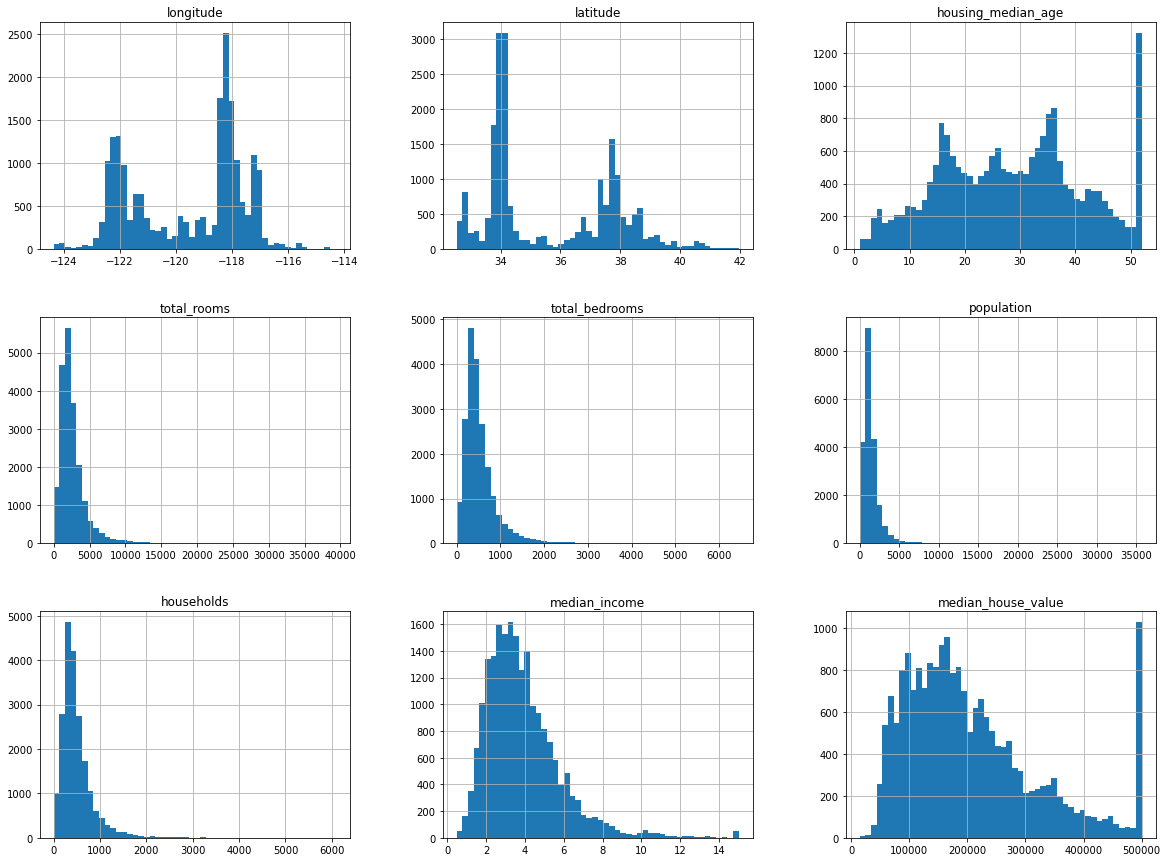

In [19]:
# To include the resulted plot/graph in the notebook document.
%matplotlib inline
import matplotlib.pyplot as plt

# Histogram plot for each attribute,
# hist() method relies on matplotlib, which in turn relies on user-specified graphical backend.
# Here %matplotlib inline, this tells the Jupyter to set up Matplotlib so it uses the Jupyter's own backend.
housing.hist(bins=50,figsize=(20,15))

# show() is optional, as jupyter always display plots after executing the cell.
plt.show()

In [25]:
# importing numpy module
import numpy as np

# Creating a test set
# It is necessary for preventing overfitting and data snooping bias.

# function for spliting into training and testing set
def split_train_test(data,test_ratio):

    # This is necessary to generate the same set of test set
    np.random.seed(23)

    # randomly arrange the indices of the rows
    shuffled_indexes = np.random.permutation(len(data))

    # get the test size
    test_set_size = int(len(data)*test_ratio)

    # 0-test size of the randomly arrange indices will be the test set
    test_indices = shuffled_indexes[:test_set_size]

    # test size - length of the randomly arrange indices will be the training set
    train_indices = shuffled_indexes[test_set_size:]

    # return the rows matching with the training and test indices as train set and test set
    return data.iloc[train_indices],data.iloc[test_indices]

# capture the returned train and test set
train_set,test_set = split_train_test(housing,0.2)

print(len(train_set))
print(len(test_set))

16512
4128


In [26]:
# Using the train_test_split function of the Scikit-Learn 
from sklearn.model_selection import train_test_split

# random_state parameter allows to set the random seed generator.
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=23)

We need to make sure that the test set is representative of the overall population. For example, if a state has Male:Female ration 6:4 and 1000 people are randomly selected then the selection should have 600 Male and 400 Female to maintain the actual ration.

Similarly, if we are told that the median income is an important attribute for predicting the median household price then we need to make sure that the median income in the test set is more representative of the overall data. Looking into the histogram of the median income, the values are clustered in the range 1.5-6. So we can group them in bins of 0-1.5, 1.5-3.0, 3.0-4.5, 4.5-6.0, 6.0-all above.

Pandas.cut() function can be use to segment and sort data values into bins. It is useful for going from a continuous variable to a categorical variable. 

<AxesSubplot:>

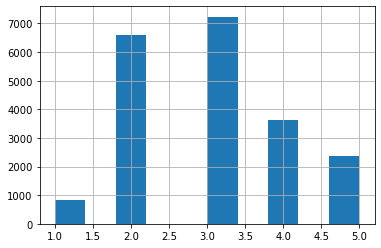

In [28]:
# Creating a income_cat attribute in the housing data to categorise median_income
housing['income_cat'] = pd.cut(housing['median_income'],
                                bins=[0., 1.5, 3., 4.5, 6., np.inf],
                                labels=[1, 2, 3, 4, 5])

housing['income_cat'].hist()
plt.show()

In [41]:
# To perform Stratified Sampling based on income category

# using StratifiedShuffleSplit of Scikit-Learn
from sklearn.model_selection import StratifiedShuffleSplit

# split object into the categorical representative of the whole data
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=23)
for train_index, test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [42]:
# We should remove the income_cat attribute, so the data is back to original state before
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

# Discover and Visualisse the data to Gain Insights

In [43]:
# copying the training data 
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

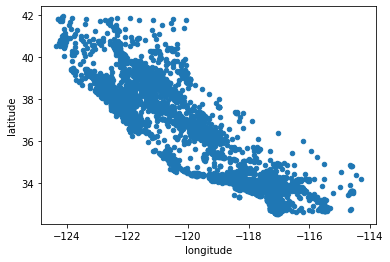

In [44]:
# Longitude and Latitude is geographical information so scatter plot is best to display the data.
housing.plot(kind="scatter",x="longitude",y="latitude")
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

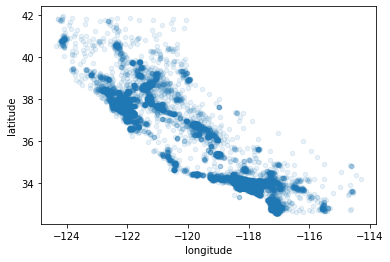

In [47]:
# Previous data doesn't reveal the place where the density is more, so using alpha=0.1 we can observe the density
housing.plot(kind="scatter",x="longitude",y="latitude", alpha=0.1)
plt.show()

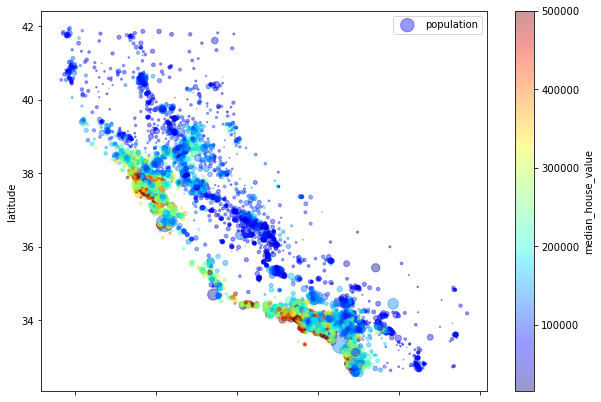

In [54]:
housing.plot(kind="scatter",x="longitude",y="latitude", alpha=0.4,
            s=housing['population']/100, label="population",figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()
plt.show()

In [55]:
# Since the datsest is not large, we can easily compute the standard correlation coefficient(Pearson's r) between each pair of attribute using corr().
corr_matrix = housing.corr()

In [59]:
# Checking how much each attribute correlates to the median_house_valuea
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688009
total_rooms           0.128921
housing_median_age    0.112327
households            0.062699
total_bedrooms        0.045911
population           -0.027925
longitude            -0.044118
latitude             -0.145360
Name: median_house_value, dtype: float64

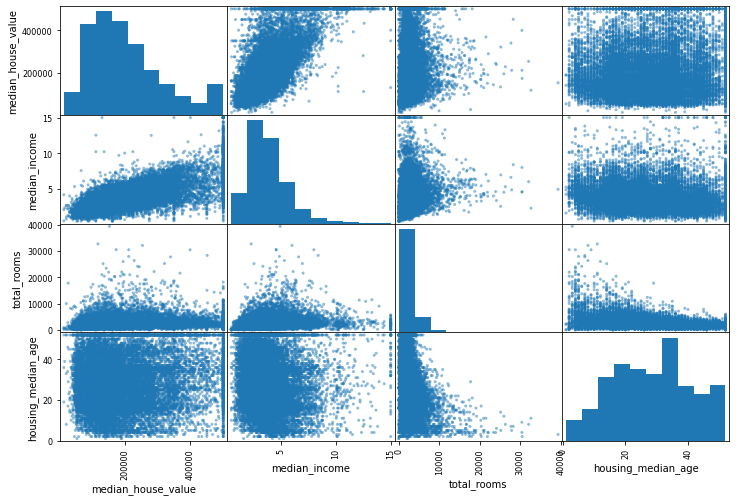

In [63]:
# Pandas have scatter_matrix() function which plots every numerical attribute against every other numberical attribute.
# since there are 9 numberical attribute, number of plots 9^2 = 81,all of which is not possible to plot.
# So we focus on some attributes that correlates the most.

# choosing the four most correlated attributes.
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']

# Plotting using scatter_matrix() function
pd.plotting.scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()


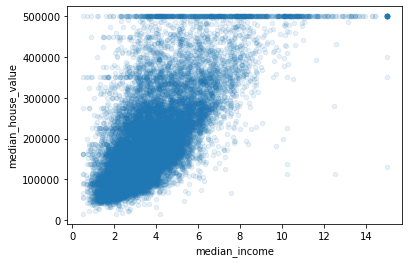

In [68]:
# Since median_income seems the most promising for predicting the median_house_value
housing.plot(kind="scatter",x='median_income',y='median_house_value',alpha=0.1)
plt.show()

In [69]:
# Other interesting attrbutes combination

# Number of rooms per household
housing['rooms_per_household'] = housing['total_rooms']/housing['households']

# Number of Bedrooms per room
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

# Number of people per households
housing['population_per_household'] = housing['population']/housing['households']

In [70]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688009
rooms_per_household         0.158000
total_rooms                 0.128921
housing_median_age          0.112327
households                  0.062699
total_bedrooms              0.045911
population                 -0.027925
population_per_household   -0.028580
longitude                  -0.044118
latitude                   -0.145360
bedrooms_per_room          -0.257307
Name: median_house_value, dtype: float64

# Preparing the Data for Machine Learning Algorithms

In [71]:
# cleaning the training dataset
# Also separating predictors and labels, since we don't necessarily want to apply the same transformations to the predictors and labels.

# Predictors -> Attributes used for predicting the value
housing = strat_train_set.drop('median_house_value',axis=1)

# Labels -> The value to be predicted
housing_labels = strat_train_set["median_house_value"].copy()

In [72]:
# Most Machine Learning cannot work with null or missing features, so we need to take care of it before apply the ML algorithms.
# We can fix missing features using:

# 1. Removing the corresponding row( here district)
# housing.dropna(subset=["total_bedrooms"])

# 2. Removing the whole attribute.
# housing.drop('total_bedrooms',axis=1)

# 3. Set the missing values to some value(0, mean, median, etc..)
# median = housing['total_bedrooms'].median()
# housing.fillna(median,inplace=True)

In [74]:
# Scikit-Learn provides a handy class to take care of missing values: SimpleImputer

# Import SimpleImputer from Scikit-Learn
from sklearn.impute import SimpleImputer

# creating the SimpleImputer instance with replacement strategy as median.
imputer = SimpleImputer(strategy="median")

# Since only numeric values will have median, hence we should create a data copy without the ocean_proximity(categorical attribute)
housing_num = housing.drop("ocean_proximity",axis=1)

# fitting the imputer instance to the training data using fit() method
imputer.fit(housing_num)

# The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable.
# Here in our case, only total_bedrooms is having missing values but we can't be sure about the other attributes if the system goes live.
# Hence, it is safer to apply imputer to all the numerical attributes.

# Displaying median of all the attributes(numerical) calculated using imputer.
print(imputer.statistics_)

# Displaying median calcuting using median() function of pandas
print(housing_num.median().values)

# The results are same.

[-118.48     34.25     29.     2121.      434.     1163.      409.
    3.5394]
[-118.48     34.25     29.     2121.      434.     1163.      409.
    3.5394]


In [82]:
# Now we can use this "trained" imputer to transform the training set by replacing missing values with the learned medians.'
X = imputer.transform(housing_num)

print(X)

# The Result is a Numpy array containing the transformed features

# To put it back into pandas dataframe
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
housing_tr.head()

[[-118.31     34.1      34.     ...  482.      134.        1.625 ]
 [-121.69     38.16     33.     ...  824.      340.        3.2937]
 [-121.03     39.21     28.     ... 1310.      525.        3.2337]
 ...
 [-117.36     34.1      33.     ... 1366.      338.        3.6227]
 [-122.65     38.99     16.     ... 1596.      666.        1.8571]
 [-117.98     33.71     24.     ... 1601.      512.        5.6825]]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4276,-118.31,34.10,34.0,399.0,141.0,482.0,134.0,1.6250
19053,-121.69,38.16,33.0,1808.0,363.0,824.0,340.0,3.2937
10039,-121.03,39.21,28.0,2843.0,535.0,1310.0,525.0,3.2337
14472,-117.22,32.85,26.0,1647.0,261.0,694.0,259.0,4.6875
15121,-116.94,32.85,31.0,1293.0,232.0,599.0,228.0,4.7578


## Handling the Text and Categorical Attributes

In [92]:
# Looking into the first 10 instances of ocean_proximity
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
4276,<1H OCEAN
19053,INLAND
10039,INLAND
14472,NEAR OCEAN
15121,<1H OCEAN
14295,NEAR OCEAN
10897,<1H OCEAN
16950,NEAR OCEAN
9923,NEAR BAY
15893,NEAR BAY


In [97]:
# The text are not arbitrary, there are limited number of possible values, where each represents a category.
# Most ML algorithms work on numerical values, so we can convert these categories from text to numbers.
# We will use Scikit-Learn's OrdinalEncode class. 

# Importing OrdinalEncode class
from sklearn.preprocessing import OrdinalEncoder

# creating an instance of OrdinalEncoder class
ordinal_encoder = OrdinalEncoder()

# apply fit and transform using fit_transform() method
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded[:15]

array([[0.],
       [1.],
       [1.],
       [4.],
       [0.],
       [4.],
       [0.],
       [4.],
       [3.],
       [3.],
       [1.],
       [0.],
       [0.],
       [4.],
       [0.]])

In [98]:
# list out the categories
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One problem with the above representation is that ML algorithm will assume that two nearby values are more similar than two distant values.

For Example, categories 0(OCEAN) and 4(NEAR OCEAN) are clearly more similar than 0(OCEAN) and 1(INLAND). Although this won't be a problem if the order match with their similarity, like "bad","average","good","excellent".

To fix this issue, a common solutions is to create one binary attribute per category: One attribute equal to 1 when the category match otherwise 0. This is called <em> one-hot encoding</em> because only one attribute can be 1(hot), while others will be 0(cold). The new attributes are sometimes called <i>dummy</i> attributes.

In [102]:
# Scikit-Learn provides a OneHotEncoder class to conver categorical values into one-hot vector

# Importing OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder

# Creating an instance of OneHotEncoder
onehot_encoder = OneHotEncoder()

# Fit and transforming housing_cat
housing_cat_1hot = onehot_encoder.fit_transform(housing_cat)

housing_cat_1hot

# The output is a Scipy Sparse matrix, instead of a NumPy array
# This is important and useful if we have categorical attribute wiht thousands of categories.
# One Hot Encoding will output a matrix with thousands of columns, and the matrix will be fill of 0 except for single 1 per row.
# This is waste of memory, so spare matrix will only store the location of the non-zero elements.

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [103]:
# We can use toarray() method to convert the it to dense NumPy array.
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [104]:
# List out the categories
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

If a categorical attribute has a large number of possible categories (e.g., country code, profession, species, etc.), then one-hot encoding will result in large number of input features. This may slow down training and degrade performance. If this happens, we may want to replace the categorical input with useful numerical features related to the categories: for example, we could replace the ocean_proximity feature with the distance to the ocean (similarly, a country code could be replaced with the country’s population and GDP per capita). Alternatively, we could replace each category with a learnable low dimensional vector called an <em>embedding</em>. Each category’s representation would be learned during training: this is an example of <em>representation learning</em>.

# Custom Transformation

Although Scikit-Learn provides many useful transformations but we will need to write our own for tasks such as custom cleanup operations or combining specific attributes. We want our transformation to work seamlessly with Scikit-Learn functionalities (such as pipelines) and since Scikit-Learn relies on duck typying(not inheritance), all we need to do is create a class and implement three methods: <b><i>fit()</i></b> ( returning self), <b><i>transform()</i></b> and <b><i>fit_transform()</i></b>.

If we add <b><i>TransformerMixin</i></b> as a base class we get the <i>fit_transform()</i> free.

Also, if we add <b><i>BaseEstimator</i></b> as a base class (and avoid <i>*args</i> and <i>**kargs</i> in our constructor) we will get two extra methods (<b><i>get_params()</i></b> and <b><i>set_params()</i></b>) that will be useful for automatic hyperparameter tuning.


In [111]:
# Custom Transformation for the combine attributes discussed above

# Import BaseEstimator and TransformerMixin
from sklearn.base import BaseEstimator, TransformerMixin

# Indices of the attributes in the housing dataset
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

# class for our custom transformation
class combineAttributesAdder(BaseEstimator, TransformerMixin):
    
    # Constructor for initializing hyperparameters( add_bedrooms_per_room )
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    # To fit onto custom transformation class.
    def fit(self, X, y=None):
        return self
    
    # To transform the dataset
    def transform(self, X, y=None):

        # NumPy array to hold the rooms_per_household values of each row
        rooms_per_household = X[:,population_ix]/X[:,household_ix]

        # NumPy array to hold the population_per_household values of each row
        population_per_household = X[:,population_ix]/X[:,household_ix]

        # Using hyperparameter, add_bedrooms_per_room, perform the action
        if self.add_bedrooms_per_room:

            # NumPy array to hold the bedrooms_per_room values of each row
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]

            # return NumPy ndarray, np.c_ concatenates along columns.
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]

        else:

            # return NumPy ndarray, np.c_ concatenates along columns.
            return np.c_[X,rooms_per_household,population_per_household]

    
# creates an instance of our custom transformation
attr_adder = combineAttributesAdder(add_bedrooms_per_room=True)

# Perform transform() method to add those extra attributes.
housing_extra_attrs = attr_adder.transform(housing.values)
housing_extra_attrs

array([[-118.31, 34.1, 34.0, ..., 3.5970149253731343, 3.5970149253731343,
        0.3533834586466165],
       [-121.69, 38.16, 33.0, ..., 2.4235294117647057,
        2.4235294117647057, 0.20077433628318583],
       [-121.03, 39.21, 28.0, ..., 2.4952380952380953,
        2.4952380952380953, 0.18818149841716497],
       ...,
       [-117.36, 34.1, 33.0, ..., 4.041420118343195, 4.041420118343195,
        0.1801470588235294],
       [-122.65, 38.99, 16.0, ..., 2.3963963963963963,
        2.3963963963963963, 0.2222481888291657],
       [-117.98, 33.71, 24.0, ..., 3.126953125, 3.126953125,
        0.1597667638483965]], dtype=object)

# Feature Scaling

One of the most important transformations we need to apply to our data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. 

This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the medianincomes only range from 0 to 15. Note that scaling the target values is generally not required.

There are two common ways to get all the attributes to have the same scale: <strong><em>min-max scaling</em></strong> and <strong><em>standardization</em></strong>.

<b>Min-Max Scaling</b> (also called <em>Normalization</em>) is the simplest: values are shifted and rescaled so that they end up ranging from 0-1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called <strong><em>MinMaxScaler</em></strong> and it has a <strong><em>feature_range</em></strong> hyperparameter that lets us change the range if we don't want 0-1.

<b>Standardization</b> is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Scikit-Learn provides a transformer called <strong><em>StandardScaler</em></strong> for standardization.

Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. 

<h4> NOTE:-</h4>
As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can we use them to transform the training set and the test set (and new data).


# Transformation Pipelines
There are many data transformations steps that need to be performed in right order.

Scikit-Learn provides the <strong><em>Pipeline</em></strong> class to help with such sequence of transformations.

In [112]:
# Importing the Pipeline class
from sklearn.pipeline import Pipeline

# Importing the StandardScaler transformer
from sklearn.preprocessing import StandardScaler

# The pipeline constructor takes a list of name/estimator pairs defining a sequence of steps.
# All but the last estimator must be a transformer(i.e., they must have a fit_transform() method)
# Names can be anything as long as they are unique.
num_pipeline = Pipeline(
    [
        ('imputer',SimpleImputer(strategy="median")),
        ('attr_adder',combineAttributesAdder()),
        ('std_scaler',StandardScaler()),
    ]
)

# The pipeline's fit() method call the fit_transform() sequentially on all tranformations passing the outpupt of each call as the parameter to the next call.
housing_num_tr = num_pipeline.fit_transform(housing_num)

housing_num_tr

array([[ 0.62160356, -0.71227007,  0.42728732, ...,  0.04976604,
         0.04976604,  2.11332419],
       [-1.0649774 ,  1.18939368,  0.34798144, ..., -0.05903503,
        -0.05903503, -0.19658316],
       [-0.73564502,  1.68120327, -0.04854795, ..., -0.05238647,
        -0.05238647, -0.38718965],
       ...,
       [ 1.09564259, -0.71227007,  0.34798144, ...,  0.09096959,
         0.09096959, -0.50879975],
       [-1.54400631,  1.57815745, -1.00021851, ..., -0.0615507 ,
        -0.0615507 ,  0.12844728],
       [ 0.78626975, -0.8949422 , -0.36577147, ...,  0.00618372,
         0.00618372, -0.81727799]])

Scikit-Learn ColumnTransformer class can be use to apply appropriate transformations to each column. This is convenient way to handle numerical and categorical columns.

The constructor requires a list of tuples, where each tuple contains a name, a transformer and a list of names (or indices) of columns that the transformer should be applied to. In this example, we specify that the numerical columns should be transformed using the <b>num_pipeline</b> that we defined earlier, and the categorical columns should be transformed using a <b>OneHotEncoder</b>. Finally, we apply this ColumnTransformer to the housing data: it applies each transformer to the appropriate columns and concatenates the outputs along the second axis (the transformers must return the same number of rows).

Note that the <b>OneHotEncoder</b> returns a sparse matrix, while the <b>num_pipeline</b> returns a dense matrix. When there is such a mix of sparse and dense matrices, the ColumnTransformer estimates the density of the final matrix (i.e., the ratio of non-zero cells), and it returns a sparse matrix if the density is lower than a given threshold (by default, sparse_threshold=0.3). In this example, it returns a dense matrix.

In [115]:
# Importing Scikit-Learn ColumnTransformer
from sklearn.compose import ColumnTransformer

# numerical attributes
num_attr = list(housing_num)

# categorical attributes
cat_attr = ['ocean_proximity']

# The ColumnTransformer constructor
full_pipeline = ColumnTransformer( 
    [
        ('nums',num_pipeline,num_attr),
        ('cat',OneHotEncoder(),cat_attr),
    ]
)

# apply fit_transform using ColumnTransformer instance
housing_prepared = full_pipeline.fit_transform(housing)

# The transformed dataset
housing_prepared

<h4>Note:-</h4>
Instead of a transformer, we can specify the string "drop" if we want the columns to be dropped. Or we can specify "passthrough" if we want the columns to be left untouched. By default, the remaining columns (i.e., the ones that were not listed) will be dropped, but we can set the remainder hyperparameter to any transformer (or to "passthrough") if we want these columns to be handled differently.

# Select and Train a Model

In [117]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Create a linear regression model instance
lin_reg = LinearRegression()

# Building the LinearRegression model using the prepared training data and training labels
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [121]:
# Testing using some instances from the training set
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ",lin_reg.predict(some_data_prepared))
print("Labels: ",list(some_labels))

Predictions:  [145061.192702   156758.39472593 107675.31163002 252276.00103601
 249797.29905052]
Labels:  [67500.0, 96400.0, 123100.0, 274400.0, 161000.0]


It works, although the predictions are not exactly accurate (e.g., the first prediction is off by close to 40%!). Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function.

In [122]:
# Importing mean_square_error function
from sklearn.metrics import mean_squared_error

# Making Predictions for training dataset prepared
housing_predictions = lin_reg.predict(housing_prepared)

# Means Square Error of the predictions
lin_mse = mean_squared_error(housing_labels,housing_predictions)

# Root Mean Square Error of the predictions, RMSE = Sqrt(MSE)
lin_rmse = np.sqrt(lin_mse)

print(lin_rmse)

68423.27281713444


Okay, this is better than nothing but clearly not a great score: most districts’ median_housing_values range between $120,000 and $265,000, so a typical prediction error of $68,628 is not very satisfying. This is an example of a model <i>underfitting</i> (Underfitting is a scenario in data science where a data model is unable to capture the relationship between the input and output variables accurately).

When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. The main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. This model is not regularized, so this rules out the last option. We could try to add more features (e.g., the log of the population), but first let’s try a more complex model to see how it does.

In [123]:
# Let's train a DecisionTreeRegressor.
# This is a powerful model, capable of finding complex nonlinear relationships in the data.

# Importing the DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Creating an instance of DecisionTreeREgressor
tree_reg = DecisionTreeRegressor()

# Building the DecisionTreeRegressor model using the prepared training data and training labels
tree_reg.fit(housing_prepared,housing_labels)


DecisionTreeRegressor()

In [124]:
# Making Predictions for training dataset prepared
housing_predictions = tree_reg.predict(housing_prepared)

# Means Square Error of the predictions
tree_mse = mean_squared_error(housing_labels,housing_predictions)

# Root Mean Square Error of the predictions, RMSE = Sqrt(MSE)
tree_rmse = np.sqrt(tree_mse)

print(tree_rmse)

0.0


No error at all? Could this model really be absolutely perfect? Of course, it is much more likely that the model has badly overfit the data. How can we be sure? we need to use part of the training set for training, and part for model validation.

# Better Evaluation using Cross Validation

One way to evaluate the Decision Tree model would be to use the train_test_split function to split the training set into a smaller training set and a validation set, then train our models against the smaller training set and evaluate them against the validation set. It’s a bit of work, but nothing too difficult and it would work fairly well.

Another great alternative is to use the Scikit-Learn's <em>K-fold cross-validation feature</em>. It randomly splits the training set into K distinct subsets called folds, then it trains and evaluates the Decision Tree model K times, picking a different fold for evaluation every time and training on the other K-1 folds. The result is an array containing the K evaluation scores.

In [127]:
# Importing the cross_val_score 
from sklearn.model_selection import cross_val_score

# The following code randomly splits the training set into 10 distinct subsets called folds, 
# then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds.
# The result is an array containing the 10 evaluation scores
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

# RMSE of the MSE scores found.
tree_rmse_scores = np.sqrt(-scores)

tree_rmse_scores

array([68690.44895598, 70028.6156706 , 68128.95867737, 68716.59444293,
       71977.11466103, 69622.46219921, 71513.68939304, 68663.27379453,
       69442.66383273, 68707.33325611])

<h4>Note:-</h4>
Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root.

In [128]:
# A Function to display the infomation of scores
def display_scores(scores):

    # The Scores of the 10 decision tree model.
    print("Scores:",scores)

    # The mean od the scores
    print("Mean:",scores.mean())

    # The Standard Deviation of the scores.
    print("Standard Deviation:",scores.std())

# Calling the function
display_scores(tree_rmse_scores)

Scores: [68690.44895598 70028.6156706  68128.95867737 68716.59444293
 71977.11466103 69622.46219921 71513.68939304 68663.27379453
 69442.66383273 68707.33325611]
Mean: 69549.11548835252
Standard Deviation: 1222.3714834279258


The Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform worse than the Linear Regression model! Notice that cross-validation allows us to get not only an estimate of the performance of our model, but also a measure of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a score of approximately 69,549, generally ± 1,222. We would not have this information if we just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always possible.

Let’s compute the same scores for the Linear Regression model just to be sure:

In [130]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse = np.sqrt(-lin_scores)
display_scores(lin_rmse)

Scores: [67993.3211257  65840.22335627 67881.09299623 70817.10183791
 67775.85566582 70875.1329662  64447.69934187 68840.14074582
 75155.08085615 67317.60289119]
Mean: 68694.32517831655
Standard Deviation: 2847.7387772221623


The Decision Tree model is overfitting so badly that it performs move or less worst than the Linear Regression model.

Let’s try one last model now: the <em>RandomForestRegressor</em>. Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further. 

In [133]:
# Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Creating RandomForestRegressor instance
forest_reg = RandomForestRegressor()

# Building the RandomForestRegressor model using prepared training data and training labels.
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [134]:
# Cross Validation Scores
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [135]:
# RMSE of MSE Scores found
forest_rmse = np.sqrt(-forest_scores)

# displaying the scores infomation
display_scores(forest_rmse)

Scores: [48677.182778   49016.00405789 48394.34909383 51537.77223407
 48289.66629107 50429.41072494 47210.44811129 50892.53670398
 52416.78482233 50596.79388567]
Mean: 49746.094870307556
Standard Deviation: 1578.0095639191447


Random Forests look very promising. However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data. However, before we dive much deeper in Random Forests, we should try out many other models from various categories of Machine Learning algorithms (several Support Vector Machines with different kernels, possibly a neural network, etc.), without spending too much time tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising models.

We should save every model we experiment with, so we can come back easily to any model we want. Make sure we save both the hyperparameters and the trained parameters, as well as the cross-validation scores and perhaps the actual predictions as well. This will allow we to easily compare scores across model types, and compare the types of errors they make. We can easily save Scikit-Learn models by using Python’s pickle module, or using joblib library, which is more efficient at serializing large NumPy arrays.

In [138]:
# import joblib

# joblib.dump(lin_reg,"linear_regression.pkl")
# joblib.dump(tree_reg,"decision_tree_regression.pkl")
# joblib.dump(forest_reg,"random_forest_regression.pkl")

In [139]:
# To Load the model
# lin_reg = joblib.load("linear_regression.pkl")
# tree_reg = joblib.load("decision_tree_regression.pkl")
# forest_reg = joblib.load("random_forest_regression.pkl")

# Fine Tuning Our Model

<h3>Grid Search</h3>
One way to do that would be to fiddle with the hyperparameters manually, until we find a great combination of hyperparameter values. This would be very tedious work, and we may not have time to explore many combinations. Instead we should get Scikit-Learn’s <em>GridSearchCV</em> to search for us. All we need to do is tell it which hyperparameters we want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation. 

For example, the following code searches for the best combination of hyperparameter values for the RandomForestRegressor.

In [150]:
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# Hyperparameter list
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

# RandomForestRegressor instance
forest_reg = RandomForestRegressor()

In [151]:
# GridSearchCV instance
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [152]:
# fitting the model 
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

When we have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a smaller number if we want a more fine-grained search, as shown in this example with the n_estimators hyperparameter).

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict, then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter).

All in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values, and it will train each model five times (since we are using five-fold cross validation). In other words, all in all, there will be 18 × 5 = 90 rounds of training! It may take quite a long time, but when it is done we can get the best combination of parameters.

In [153]:
# Best parameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

Since 6 and 30 are the maximum values that were evaluated, we should probably try searching again with higher values, since the score may continue to improve.

In [154]:
# Best estimator
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

If GridSearchCV is initialized with refit=True (which is the default), then once it finds the best estimator using crossvalidation, it retrains it on the whole training set. This is usually a good idea since feeding it more data will likely improve its performance.

In [155]:
# Cross validation results
cvres = grid_search.cv_results_
print(cvres)

{'mean_fit_time': array([0.06716857, 0.21580067, 0.65279827, 0.10799894, 0.33219724,
       0.99219995, 0.17319832, 0.57060094, 1.32290239, 0.16779227,
       0.5577991 , 1.8362062 , 0.11100025, 0.33659868, 0.14200077,
       0.4107995 , 0.15979834, 0.52420149]), 'std_fit_time': array([0.00882409, 0.00785871, 0.04568214, 0.00626022, 0.00956042,
       0.0255705 , 0.05142143, 0.11702014, 0.01829966, 0.00633518,
       0.02904852, 0.20397563, 0.01612559, 0.02209791, 0.00632214,
       0.02831695, 0.01474295, 0.02070315]), 'mean_score_time': array([0.00419464, 0.01040034, 0.03020058, 0.00400162, 0.01040616,
       0.0277988 , 0.00419936, 0.01279984, 0.02740226, 0.00319996,
       0.00999908, 0.02819633, 0.00440078, 0.01280141, 0.00480027,
       0.01100049, 0.00500145, 0.0114007 ]), 'std_score_time': array([0.00098063, 0.00135675, 0.00278646, 0.00063422, 0.00080632,
       0.00470679, 0.00146892, 0.00331048, 0.00313904, 0.00039976,
       0.00063158, 0.00507735, 0.00048936, 0.0017207 , 0.

In [156]:
# Printing the mean rmse for each combination of parameters
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

63141.83796569301 {'max_features': 2, 'n_estimators': 3}
54982.597617610794 {'max_features': 2, 'n_estimators': 10}
52192.458556981575 {'max_features': 2, 'n_estimators': 30}
59556.0051766676 {'max_features': 4, 'n_estimators': 3}
53291.66757422234 {'max_features': 4, 'n_estimators': 10}
50309.743319194036 {'max_features': 4, 'n_estimators': 30}
59370.96178178427 {'max_features': 6, 'n_estimators': 3}
52193.949420260054 {'max_features': 6, 'n_estimators': 10}
49877.785889476116 {'max_features': 6, 'n_estimators': 30}
58366.169680938976 {'max_features': 8, 'n_estimators': 3}
52155.859367403966 {'max_features': 8, 'n_estimators': 10}
50409.717528615 {'max_features': 8, 'n_estimators': 30}
62047.860847470525 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54855.43405575725 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59657.043251025 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52405.316671041895 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In this example, we obtain the best solution by setting the max_features hyperparameter to 8, and the n_estimators hyperparameter to 30. The RMSE score for this combination is 49,877, which is almost the same score we got earlier using the default hyperparameter values (which was 49,746).

We can treat some of the data preparation steps as hyperparameters. For example, the grid search will automatically find out whether or not to add a feature we were not sure about (e.g., using the add_bedrooms_per_room hyperparameter of our CombinedAttributesAdder transformer). It may similarly be used to automatically find the best way to handle outliers, missing features, feature selection, and more.

<h3>Randomized Search</h3>
The grid search approach is fine when we are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use <strong><em>RandomizedSearchCV</em></strong> instead. This class can be used in much the same way as the <strong><em>GridSearchCV</em></strong> class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:

• If we let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).

• We have more control over the computing budget we want to allocate to hyperparameter search, simply by setting the number of iterations.


<h3>Ensemble Methods</h3>
Another way to fine-tune our system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors.


# Analyze the Best Models and Their Errors
We will often gain good insights on the problem by inspecting the best models. For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:

In [149]:
# Important scores
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.24102624e-02, 7.31082275e-02, 4.32353676e-02, 1.86984590e-02,
       1.62344603e-02, 1.67861661e-02, 1.62118600e-02, 3.50214305e-01,
       6.85556889e-02, 6.17180320e-02, 9.03197116e-02, 1.10356091e-02,
       1.53115877e-01, 2.75716970e-04, 3.61327866e-03, 4.46697826e-03])

In [159]:
# Displaying the found importance scores next to their corresponding attributes names

# The custom attribute we introduced
extra_attrs = ['room_per_hhold','pop_per_hhold','bedrooms_per_room']

# One-Hot Encoding of the categorical attribute, ocean_proximity
cat_encoder = full_pipeline.named_transformers_['cat']
print(cat_encoder.categories_)

# converting from NumPy ndarray to list
cat_one_hot_attrs = list(cat_encoder.categories_[0])
print(cat_one_hot_attrs)

# List of all the attributes in the training dataset
attributes = num_attr + extra_attrs + cat_one_hot_attrs

# Sort in descending order
sorted(zip(feature_importances,attributes),reverse=True)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']


[(0.3502143045359459, 'median_income'),
 (0.15311587699492107, 'INLAND'),
 (0.09031971162616416, 'bedrooms_per_room'),
 (0.07310822745537775, 'latitude'),
 (0.07241026242245192, 'longitude'),
 (0.06855568893667925, 'room_per_hhold'),
 (0.061718031979196335, 'pop_per_hhold'),
 (0.04323536761282536, 'housing_median_age'),
 (0.018698459024764212, 'total_rooms'),
 (0.01678616609514753, 'population'),
 (0.01623446031516534, 'total_bedrooms'),
 (0.016211859982171308, 'households'),
 (0.011035609132246138, '<1H OCEAN'),
 (0.004466978260379679, 'NEAR OCEAN'),
 (0.003613278656410727, 'NEAR BAY'),
 (0.0002757169701533099, 'ISLAND')]

With this information, we may want to try dropping some of the less useful features (e.g., apparently only one ocean_proximity category is really useful, so we could try dropping the others). We should also look at the specific errors that our system makes, then try to understand why it makes them and what could fix the problem (adding extra features or, on the contrary, getting rid of uninformative ones, cleaning up outliers, etc.).

# Evaluate the System on the Test Set

In [163]:
#  Run our full_pipeline to transform the data (call transform(), not fit_transform(), we do not want to fit the test set!)

# Selecting the best estimator(As found in the above, it is RandomForestRegressor with n_estimators=30 and max_features=6)
final_model = grid_search.best_estimator_

# All the predictors of the test set
X_test = strat_test_set.drop("median_house_value",axis=1)

# Labels to later compare against the predicted labels
y_test = strat_test_set['median_house_value'].copy()

# Performing full_pipeline to make the categorical and numerical attributes uniformed format with train set
X_test_prepared = full_pipeline.transform(X_test)

# Predicted labels for the test set
final_predictions = final_model.predict(X_test_prepared)

# RMSE of Final Model
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

51074.250826657175

In some cases, such a point estimate of the generalization error will not be quite enough to convince us to launch: what if it is just 0.1% better than the model currently in production? We might want to have an idea of how precise this estimate is. For this, We can compute a 95% confidence interval for the generalization error using <strong><em>scipy.stats.t.interval()</em></strong>.

In [165]:
# Importing stats
from scipy import stats 

# Confidence Interval 
confidence = 0.95

# Squared Errors of predicted and true value
squared_errors = (final_predictions - y_test)**2

# Confidence interval
Interval = stats.t.interval(confidence,
                    len(squared_errors)-1,
                    loc=squared_errors.mean(),
                    scale=stats.sem(squared_errors))
print(Interval)

np.sqrt(Interval)


(2369340824.3482437, 2847817370.6603384)


array([48675.87517804, 53364.94514811])